In [1]:
#imports
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Task 0. Valid Convolution
"""
Function that performs a valid convolution on greyscale images
"""
def convolve_grayscale_valid(images, kernel):
    """
    images: numpy.nparray with shape (m, h, w) containing multiple greyscale
    images
        m: number of images
        h: height of the images in pixels
        w: width of the images in pixels
    kernel: numpy.ndarray with shape (kh, kw) containing the kernel for
    convolution
        kh: kernel height
        kw: kernel width
    Only allowed to use two for loops, no loops of other kind
    Returns a numpy.ndarray containing the convolved images
    """
    m = images.shape[0]
    h = images.shape[1]
    w = images.shape[2]

    kh = kernel.shape[0]
    kw = kernel.shape[1]

    cvh = h - kh + 1 #convolve valid height
    cvw = w - kw + 1 #convolve valid width
    cvm = np.zeros((m, cvh, cvw)) #convolve valid matrix

    # print(np.shape(images))
    # print(np.shape(kernel))
    # print(np.shape(cvm))

    for x in range(cvh):
        for y in range(cvw):
            # print("images", end="")
            # print(np.shape(images[:, x:x + kh, y:y + kw]))
            # print("kernel", end="")
            # print(np.shape(kernel))
            hadamard_prod = np.multiply(images[:, x:x + kh, y:y + kw], kernel)
            # print("hadamard", end="")
            # print(np.shape(hadamard_prod))
            cvm[:, x, y] = np.sum(hadamard_prod, axis=(1, 2))
    return cvm



In [ ]:
# 0-main
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_valid(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [4]:
# Task 1. Same Convolution
"""
Function that performs a same convolution on greyscale images
"""
def convolve_grayscale_same(images, kernel):
    """
    images: numpy.nparray with shape (m, h, w) containing multiple greyscale
    images
        m: number of images
        h: height of the images in pixels
        w: width of the images in pixels
    kernel: numpy.ndarray with shape (kh, kw) containing the kernel for
    convolution
        kh: kernel height
        kw: kernel width
    If necessary, the image should be padded with 0's
    Only allowed to use two for loops, no loops of other kind
    Returns a numpy.ndarray containing the convolved images
    """
    m = images.shape[0]
    h = images.shape[1]
    w = images.shape[2]

    kh = kernel.shape[0]
    kw = kernel.shape[1]

    pad_top_bottom = kh // 2
    pad_left_right = kw // 2

    # print(np.shape(images))
    images = np.pad(images, ((0, 0), (pad_top_bottom, pad_top_bottom),
                             (pad_left_right, pad_left_right)))
    # print(np.shape(images))

    csm = np.zeros((m, h, w)) # convolve same matrix
    # print(np.shape(csm))
    # print(csh)
    # print(csw)

    for x in range(h):
        for y in range(w):
            # print("Matrix Location ({}, {})".format(x, y))
            hadamard_prod = np.multiply(images[:, x:x + kh, y:y + kw], kernel)
            csm[:, x, y] = np.sum(hadamard_prod, axis=(1, 2))
    # print(np.shape(csm))
    # np.pad(csm, [(1, 0), (1, 0)], mode='constant')
    # print(np.shape(csm))
    return csm


In [ ]:
# 1-main
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_same(images, kernel)
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [10]:
# Task 2. Convolution with Padding
"""
Write a function that performs a convolution on grayscale images with custom
padding
"""
def convolve_grayscale_padding(images, kernel, padding):
    """
    images: numpy.ndarray with shape (m, h, w) containing multiple images
        m: number of images
        h: height in pixels of the images
        w: width in pixels of the images
    kernel: numpy.ndarray with shape (kh, kw) containing the kernel for
    convolution
        kh: height of the kernel
        kw: width of the kernel
    padding: tuple of(ph, pw)
        ph: padding for the height of the image
        pw: padding for the width of the image
        the image should be padded with 0's
    Only allowed to use two for loops
    Returns a numpy.ndarray containing the convolved images
    """

    kh = kernel.shape[0]
    kw = kernel.shape[1]

    pad_top_bottom = padding[0]
    pad_left_right = padding[1]

    m = images.shape[0]
    h = images.shape[1] + (2 * padding[0]) - kh + 1
    w = images.shape[2] + (2 * padding[1]) - kw + 1

    # print("padding[0] {}".format(padding[0]))
    # print("padding[1] {}".format(padding[1]))

    images = np.pad(images, ((0, 0), (pad_top_bottom, pad_top_bottom),
                             (pad_left_right, pad_left_right)))

    csm = np.zeros((m, h, w))
    # print(np.shape(csm))

    for x in range(h):
        for y in range(w):
            # print("Matrix Location ({}, {})".format(x, y))
            hadamard_prod = np.multiply(images[:, x:x + kh, y:y + kw], kernel)
            csm[:, x, y] = np.sum(hadamard_prod, axis=(1, 2))
    return csm

In [ ]:
# 3-main
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale_padding(images, kernel, (2, 4))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()

In [28]:
# Task 3. Strided Convolution
"""
Write a function that performs a convolution on grayscale images
"""
def convolve_grayscale(images, kernel, padding='same', stride=(1, 1)):
    """
    images: numpy.ndarray with shape (m, h, w) containing multiple images
        m: number of images
        h: height in pixels of the images
        w: width in pixels of the images
    kernel: numpy.ndarray with shape (kh, kw) containing the kernel for
    convolution
        kh: height of the kernel
        kw: width of the kernel
    padding: tuple of(ph, pw)
        if `same`, performs a same convolution
        if `valid`, performs a valid convolution
        if a tuple (ph, pw)
            ph: padding for the height of the image
            pw: padding for the width of the image
        the image should be padded with 0's
    stride: tuple of sh, sw)
        sh: stride for the height of the image
        sw: stride for the width of the image
    Only allowed to use two for loops
    Returns a numpy.ndarray containing the convolved images
    """
    m = images.shape[0]
    h = images.shape[1]
    w = images.shape[2]

    kh = kernel.shape[0]
    kw = kernel.shape[1]

    sh = stride[0]
    sw = stride[1]

    if padding == 'same':
        """Do same padding here"""
        h = h // sh
        w = w // sw

    elif padding == 'valid':
        """Do valid padding here"""
        h = (h - kh + 1) // sh
        w = (w - kw + 1) // sh

    else:
        """Do padding here"""
        h = (h + (2 * padding[0]) - kh + 1) // sh
        w = (w + (2 * padding[1]) - kw + 1) // sw

    output_image = np.zeros((m, h, w))
    print(np.shape(output_image))

    for x in range (h):
        for y in range (w):
            i = x * sh
            j = y * sw
            hadamard_prod = np.multiply(images[:, i:i + kh, j:j + kw], kernel)
            output_image[:, x, y] = np.sum(hadamard_prod, axis=(1, 2))
    return output_image


(50000, 28, 28)
(50000, 13, 13)
(50000, 13, 13)


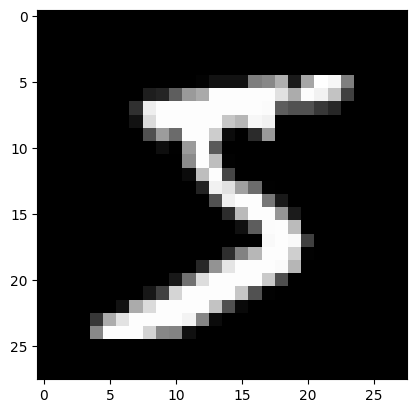

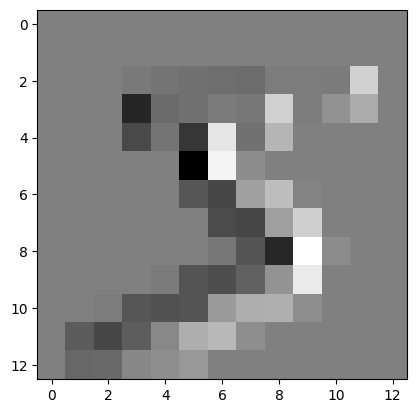

In [29]:
# 4-main
dataset = np.load('../../supervised_learning/data/MNIST.npz')
images = dataset['X_train']
print(images.shape)
kernel = np.array([[1 ,0, -1], [1, 0, -1], [1, 0, -1]])
images_conv = convolve_grayscale(images, kernel, padding='valid', stride=(2, 2))
print(images_conv.shape)

plt.imshow(images[0], cmap='gray')
plt.show()
plt.imshow(images_conv[0], cmap='gray')
plt.show()